# russian-news-2020

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("vfomenko/russian-news-2020")

# print("Path to dataset files:", path)

In [57]:
import re
import pandas as pd

df = pd.read_csv("./data/russian-news-2020/news.csv").rename(columns={"publication_date": "date"})
df["text"] = df["text"].apply(lambda x: re.sub(r'\s+', ' ', x).replace(" ,", ",").replace(" .", ".").strip())
df = df[["source", "text", "date"]].query("source != \'lenta.ru\'")
df

,source,text,date
4510,meduza.io,На съемочную группу отдела расследований ФБК н...,"18:03, 31 августа 2020"
4511,meduza.io,Умер художественный руководитель мультипликаци...,"10:22, 30 августа 2020"
4512,meduza.io,Каждую неделю сотрудники «Медузы» слушают новы...,"10:43, 30 августа 2020"
4513,meduza.io,Владимир Путин и Александр Лукашенко договорил...,"09:28, 30 августа 2020"
4514,meduza.io,В Минске начали задерживать участников «Марша ...,"11:09, 30 августа 2020"
...,...,...,...
21668,tjournal.ru,Россия прекратила поставки нефти на белорусски...,1578056674
21669,tjournal.ru,Светодиодную конструкцию не хотели убирать из-...,1577866951
21670,tjournal.ru,Власти направили военные корабли и авиацию для...,1577864124
21671,tjournal.ru,"С каждым годом количество горожан, выбирающих ...",1577894168


In [58]:
from datetime import datetime
import dateutil.parser
import re

RU_MONTHS = {
    'января': '01', 'февраля': '02', 'марта': '03', 'апреля': '04',
    'мая': '05', 'июня': '06', 'июля': '07', 'августа': '08',
    'сентября': '09', 'октября': '10', 'ноября': '11', 'декабря': '12',
}

def normalize_date(value: str) -> str:
    value = value.strip()

    # --- 1) ДД.ММ.ГГГГ внутри строки ---
    m = re.search(r'(\d{2})\.(\d{2})\.(\d{4})', value)
    if m:
        day, month, year = m.groups()
        return datetime(int(year), int(month), int(day)).date()  # f"{y}-{mth}-{d}"

    # --- 2) Русские даты внутри строки ---
    # Пример: "18:03, 31 августа 2020"
    m = re.search(r'(\d{1,2})\s+(\w+)\s+(\d{4})', value)
    if m and m.group(2).lower() in RU_MONTHS:
        day, month_word, year = m.groups()
        month = RU_MONTHS[month_word.lower()]
        return datetime(int(year), int(month), int(day)).date()  # f"{year}-{month}-{day.zfill(2)}"

    # --- 3) Unix timestamp ---
    if value.isdigit():
        dt = datetime.fromtimestamp(int(value))
        return dt.date()  #.strftime("%Y-%m-%d")

    # --- 4) ISO и любые другие форматы ---
    try:
        dt = dateutil.parser.isoparse(value)
        return dt.date()  #.strftime("%Y-%m-%d")
    except Exception:
        pass

    raise ValueError(f"Не удалось распознать дату: {value}")


df["date"] = df["date"].apply(normalize_date)
df

,source,text,date
4510,meduza.io,На съемочную группу отдела расследований ФБК н...,2020-08-31
4511,meduza.io,Умер художественный руководитель мультипликаци...,2020-08-30
4512,meduza.io,Каждую неделю сотрудники «Медузы» слушают новы...,2020-08-30
4513,meduza.io,Владимир Путин и Александр Лукашенко договорил...,2020-08-30
4514,meduza.io,В Минске начали задерживать участников «Марша ...,2020-08-30
...,...,...,...
21668,tjournal.ru,Россия прекратила поставки нефти на белорусски...,2020-01-03
21669,tjournal.ru,Светодиодную конструкцию не хотели убирать из-...,2020-01-01
21670,tjournal.ru,Власти направили военные корабли и авиацию для...,2020-01-01
21671,tjournal.ru,"С каждым годом количество горожан, выбирающих ...",2020-01-01


In [59]:
df["source"].value_counts()

source
ria.ru         14755
meduza.io       1538
tjournal.ru      870
Name: count, dtype: int64

### tjournal.ru 

In [60]:
a = set()
for t in df[df["source"] == "tjournal.ru"]["text"]:
    s = set(t.split())
    a = a & s if a else a | s
a

{'Отписаться', 'Подписан', 'Подписаться'}

In [61]:
mask = df["source"] == "tjournal.ru"
df.loc[mask, "text"] = df[mask]["text"].apply(lambda x: x.split("Подписаться")[0])
df

,source,text,date
4510,meduza.io,На съемочную группу отдела расследований ФБК н...,2020-08-31
4511,meduza.io,Умер художественный руководитель мультипликаци...,2020-08-30
4512,meduza.io,Каждую неделю сотрудники «Медузы» слушают новы...,2020-08-30
4513,meduza.io,Владимир Путин и Александр Лукашенко договорил...,2020-08-30
4514,meduza.io,В Минске начали задерживать участников «Марша ...,2020-08-30
...,...,...,...
21668,tjournal.ru,Россия прекратила поставки нефти на белорусски...,2020-01-03
21669,tjournal.ru,Светодиодную конструкцию не хотели убирать из-...,2020-01-01
21670,tjournal.ru,Власти направили военные корабли и авиацию для...,2020-01-01
21671,tjournal.ru,"С каждым годом количество горожан, выбирающих ...",2020-01-01


### meduza.io - аномалий не нашел

In [62]:
df[df["source"] == "meduza.io"].sample(10)["text"].values

array(['Двум сотрудникам аппарата ЛДПР предъявили обвинение в хищении денег молодежных организаций партии, сообщает МВД. О какой сумме идет речь, в полиции не уточнили. Как утверждают в МВД, обвиняемые настаивали на очной ставке с вице-спикером Госдумы, сыном Владимира Жириновского Игорем Лебедевым, по указанию которого, по их словам, они тратили похищенные деньги. Лебедев от очных ставок отказывался, сказано в сообщении МВД. Сам депутат сказал «Интерфаксу», что «и допрос, и снятия показаний, очные ставки — все давным-давно проведено и закончено еще в прошлом году». По словам Лебедева, к нему со стороны следствия нет «ни вопросов, ни претензий». Он назвал сообщение МВД об уголовном деле «чушью и провокацией», а также призвал привлечь «как минимум к административной ответственности» сотрудника, опубликовавшего пресс-релиз.',
       'До карантина и ограничений, связанных с коронавирусом, каждые выходные на «Медузе» выходили ультракороткие рецензии от кинокритика Антона Долина, которые по

### ria.ru

In [63]:
mask = df["source"] == "ria.ru"
df[mask].sample(10)["text"].values

array(['МОСКВА, 27 мая – РИА Новости. Россияне на самоизоляции стали больше интересоваться ремонтом и обустройством балконов, показало имеющееся в распоряжении РИА Новости исследование сервиса бесплатных объявлений "Юла". Исследование основано на данных анализа поисковых запросов на сервисе в период самоизоляции (с 1 апреля по 25 мая) в сравнении с аналогичным периодом до него (с 1 февраля по 25 марта). Под обустройством балкона подразумевается спрос на стройматериалы, услуги по дизайну интерьера, товары для балкона и террас, сопутствующую мебель, а также другие поисковые запросы со словом "балкон". "Во время карантина интерес к ремонту и обустройству балконов вырос в 2,1 раза", - говорится в документе. В частности, пользователи стали чаще искать материалы для ремонта (рост в 2,6 раза), краску (рост в 1,9 раза), балконные ящики-кашпо для цветов (рост в 1,8 раза) и услуги по дизайну интерьера и балконов (рост в 1,7 раза). Помимо этого, россияне стали чаще обращаться за услугами по утепл

In [64]:
from string import punctuation, whitespace

skip_alph = whitespace + punctuation
label = "РИА Новости"

def process_ria(s):
    if label in s[:50]:
        city, text = s.split(",", 1)
        date_label, text = text.lstrip(skip_alph).split(".", 1)
        if label in date_label:
            date, maybe_text = date_label.split(label, 1)
            maybe_text = maybe_text.lstrip(skip_alph)
            if len(maybe_text.split()) <= 4:  # упоминание имени и фамилии двух человек
                return text.lstrip(skip_alph)
            else:
                return maybe_text + text
    return s

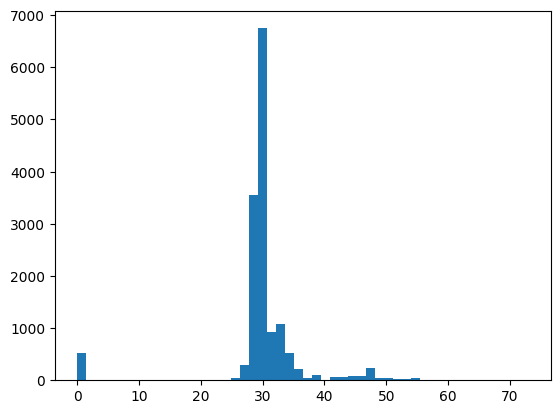

In [65]:
import matplotlib.pyplot as plt

plt.hist(df[mask]["text"].apply(lambda x: len(x) - len(process_ria(x))), bins=50)
plt.show()

In [66]:
df.loc[mask, "text"] = df[mask]["text"].apply(process_ria)

### Сохранение

In [67]:
import json

with open("./data/russian-news-2020/data.json", "w", encoding="utf-8") as f:
    json.dump(df.astype({"date": str}).to_dict("records"), f, indent=4, ensure_ascii=False)

### Визуализация

In [6]:
import numpy as np

n = len(df)
date_diff = np.zeros((n, n), dtype=float)
dt = [d.timetuple().tm_yday for d in df["publication_date"].values]

for i in range(n):
    for j in range(i + 1, n):
        date_diff[i, j] = abs(dt[i] - dt[j])
date_diff[:5, :5]

array([[  0.,  59., 124.,  56., 167.],
       [  0.,   0.,  65.,   3., 108.],
       [  0.,   0.,   0.,  68.,  43.],
       [  0.,   0.,   0.,   0., 111.],
       [  0.,   0.,   0.,   0.,   0.]])

In [ ]:
import torch
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

def embed_batch(texts, batch_size=16):
    all_embeds = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        emb = model.encode(batch, convert_to_tensor=True, normalize_embeddings=True)
        all_embeds.append(emb.cpu())
        torch.cuda.empty_cache()
    return torch.cat(all_embeds, dim=0)


model = SentenceTransformer("deepvk/USER-bge-m3")
embeddings = embed_batch(df["text"].values)
similarities = model.similarity(embeddings, embeddings) 
print(embeddings.shape)

100%|██████████| 313/313 [06:34<00:00,  1.26s/it]

torch.Size([5000, 1024])


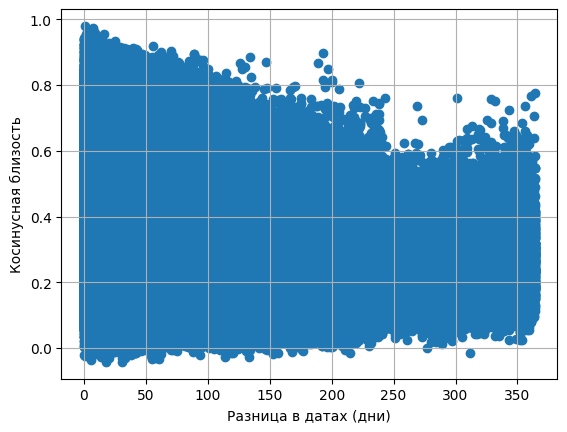

In [ ]:
import matplotlib.pyplot as plt

xs, ys = [], []
for i in range(n):
    for j in range(i + 1, n):   # строго правее диагонали
        xs.append(date_diff[i, j])   # разница дат
        ys.append(similarities[i, j])  # косинусная близость

plt.scatter(xs, ys)
plt.xlabel("Разница в датах (дни)")
plt.ylabel("Косинусная близость")
plt.grid(True)
plt.show()

# kommersantru-news-titles-19922021

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("kulbaka/kommersantru-news-titles-19922021")

# print("Path to dataset files:", path)

In [1]:
import pandas as pd
from datetime import date

df = pd.read_csv("./data/kommersantru-news-titles-19922021/russian-news-titles-1992-2022.csv")
df["date"] = pd.to_datetime(df["date"]).dt.date
df = df[(df["date"] > date(2019, 12, 31)) & (df["date"] < date(2022, 1, 1))].sort_values(by="date").drop_duplicates(subset="url")
df

,date,url,title
565525,2020-01-03,kommersant.ru/doc/4208269,Береженого год бережет
565550,2020-01-09,kommersant.ru/doc/4215026,Индексы ведущих фондовых бирж 08.01.20
565551,2020-01-09,kommersant.ru/doc/4215027,Официальные курсы ЦБ России на 09.01.19
565552,2020-01-09,kommersant.ru/doc/4214985,Микрофинансисты наращивают долг
565553,2020-01-09,kommersant.ru/doc/4214982,«Федерацию» продали «Региону»
...,...,...,...
584778,2021-12-29,kommersant.ru/doc/5154067,ПО стопам пиратов
584777,2021-12-29,kommersant.ru/doc/5153960,Что-то с памятью не так стало
584795,2021-12-29,kommersant.ru/doc/5154117,Для спасения Яны Степановой не хватает 1 005 6...
584785,2021-12-29,kommersant.ru/doc/5154115,Сегодняшнее число


In [2]:
import requests
from bs4 import BeautifulSoup

def get_kommersant_article(url: str) -> dict:
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/120.0.0.0 Safari/537.36"
    }
    resp = requests.get(url, headers=headers)
    resp.raise_for_status()

    soup = BeautifulSoup(resp.text, "html.parser")

    # # Название
    # title_el = soup.select_one("h1.doc_header__name")
    # title = title_el.get_text(strip=True) if title_el else None

    # # Дата (если надо)
    # date_el = soup.select_one("time.doc_header__publish_time")
    # date = date_el.get_text(strip=True) if date_el else None

    # Основной текст статьи
    body_el = soup.select_one("div.doc__body")
    text = body_el.get_text(separator="\n", strip=True) if body_el else None

    return text

In [4]:
from time import sleep
import random
random.seed(42)
import json

from tqdm import tqdm

i = 0
with open("./data/kommersantru-news-titles-19922021/articles.jsonl", "r", encoding="utf-8") as f:
    for l in f:
        i += 1

with open("./data/kommersantru-news-titles-19922021/articles.jsonl", "a", encoding="utf-8") as f:
    for i, row in tqdm(enumerate(df.to_dict("records")[i:])):
        url = row["url"]
        id_ = url.split("/")[-1]
        article = get_kommersant_article("https://www." + url)
        f.write(json.dumps({"text": article, "date": str(row["date"])}, ensure_ascii=False) + "\n")

        if i % 5 == 0:
            sleep(random.random())

4655it [1:01:39,  1.26it/s]


In [53]:
import json

import pandas as pd

notes = []
with open("./data/kommersantru-news-titles-19922021/articles.jsonl", "r", encoding="utf-8") as f:
    for l in f:
        notes.append(json.loads(l))

df = pd.DataFrame(notes)
df["source"] = "kommersant.ru"
df

,text,date,source
0,Береженого год бережет\nПервый номер газеты «К...,2020-01-03,kommersant.ru
1,Индексы ведущих фондовых бирж 08.01.20\nNikke...,2020-01-09,kommersant.ru
2,Официальные курсы ЦБ России на 09.01.19\nАвстр...,2020-01-09,kommersant.ru
3,Микрофинансисты наращивают долг\nИнвестировани...,2020-01-09,kommersant.ru
4,«Федерацию» продали «Региону»\nГруппа компаний...,2020-01-09,kommersant.ru
...,...,...,...
17844,ПО стопам пиратов\nСофт для взлома онлайн-кино...,2021-12-29,kommersant.ru
17845,Что-то с памятью не так стало\nВерховный суд л...,2021-12-29,kommersant.ru
17846,Для спасения Яны Степановой не хватает 1 005 6...,2021-12-29,kommersant.ru
17847,Сегодняшнее число\n305 миллиардов рублей\nсост...,2021-12-29,kommersant.ru


In [ ]:
import re


def clean_string(x):
    v = re.sub(r'\s{2,}', ' ', x)
    v = "\n".join([
        row for row in v.split("\n")[:-1] if all(
            pattern not in row for pattern in [
                "Фото:",
                "Рисунок:",
                "Выйти из полноэкранного режима",
                "Читать подробнее",
                "Развернуть на весь экран",
                "купить фото",
                "Предыдущая фотография",
                "Следующая фотография",
            ]
        ) and row != "/"
    ])
    return re.sub(r'\s', ' ', v).strip()

df["text"] = df["text"].apply(clean_string)

with open("./data/kommersantru-news-titles-19922021/data.json", "w", encoding="utf-8") as f:
    json.dump(df.to_dict("records"), f, indent=4, ensure_ascii=False)

# news-dataset-from-fontanka-ru-2021-2023

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("marialevchenko/news-dataset-from-fontanka-ru-2021-2023")

# print("Path to dataset files:", path)

In [ ]:
import json
from datetime import date
from string import punctuation

import pandas as pd

def parse_date(x):
    year, month, day, id_ = x.split("https://www.fontanka.ru/")[-1].rstrip(punctuation).split("/")
    return date(int(year), int(month), int(day))

df = pd.read_csv("./data/news-dataset-from-fontanka-ru-2021-2023/fontanka.csv")
df["date"] = df["url"].apply(parse_date)
df = (
    df[(df["date"] > date(2019, 12, 31)) & (df["date"] < date(2022, 1, 1))]
    .sort_values(by="date")
    .drop_duplicates(subset="text")
    .dropna()
    [["text", "date"]]
)
df["source"] = "fontanka.ru"

with open("./data/news-dataset-from-fontanka-ru-2021-2023/data.json", "w", encoding="utf-8") as f:
    json.dump(df.astype({"date": str}).to_dict("records"), f, indent=4, ensure_ascii=False)

# news-dataset-from-lenta-ru-2019-2023

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("marialevchenko/news-dataset-from-lenta-ru-2019-2023")

# print("Path to dataset files:", path)

In [ ]:
import json
from datetime import date

import pandas as pd

df = pd.read_csv("./data/news-dataset-from-lenta-ru-2019-2023/lenta_ru_news_2019_2023.csv")[["text", "date"]]
df["date"] = pd.to_datetime(df["date"]).dt.date
df = (
    df[(df["date"] > date(2019, 12, 31)) & (df["date"] < date(2022, 1, 1))]
    .sort_values(by="date")
    .drop_duplicates(subset="text")
    .dropna()
)
df["source"] = "lenta.ru"

with open("./data/news-dataset-from-lenta-ru-2019-2023/data.json", "w", encoding="utf-8") as f:
    json.dump(df.astype({"date": str}).to_dict("records"), f, indent=4, ensure_ascii=False)

# Составление единого датасета

In [85]:
import os

import pandas as pd

notes = []
for folder in os.listdir("./data"):
    with open(os.path.join("data", folder, "data.json"), "r", encoding="utf-8") as f:
        notes.extend(json.load(f))

df = pd.DataFrame(notes)
df["date"] = pd.to_datetime(df["date"])
del notes
df

,source,text,date
0,meduza.io,На съемочную группу отдела расследований ФБК н...,2020-08-31
1,meduza.io,Умер художественный руководитель мультипликаци...,2020-08-30
2,meduza.io,Каждую неделю сотрудники «Медузы» слушают новы...,2020-08-30
3,meduza.io,Владимир Путин и Александр Лукашенко договорил...,2020-08-30
4,meduza.io,В Минске начали задерживать участников «Марша ...,2020-08-30
...,...,...,...
269749,kommersant.ru,ПО стопам пиратов Софт для взлома онлайн-кинот...,2021-12-29
269750,kommersant.ru,Что-то с памятью не так стало Верховный суд ли...,2021-12-29
269751,kommersant.ru,Для спасения Яны Степановой не хватает 1 005 6...,2021-12-29
269752,kommersant.ru,Сегодняшнее число 305 миллиардов рублей состав...,2021-12-29


sample_size=10000, group_size=113


/tmp/ipykernel_102139/1881471629.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=group_size, random_state=42, replace=False) if len(g) > group_size else g)


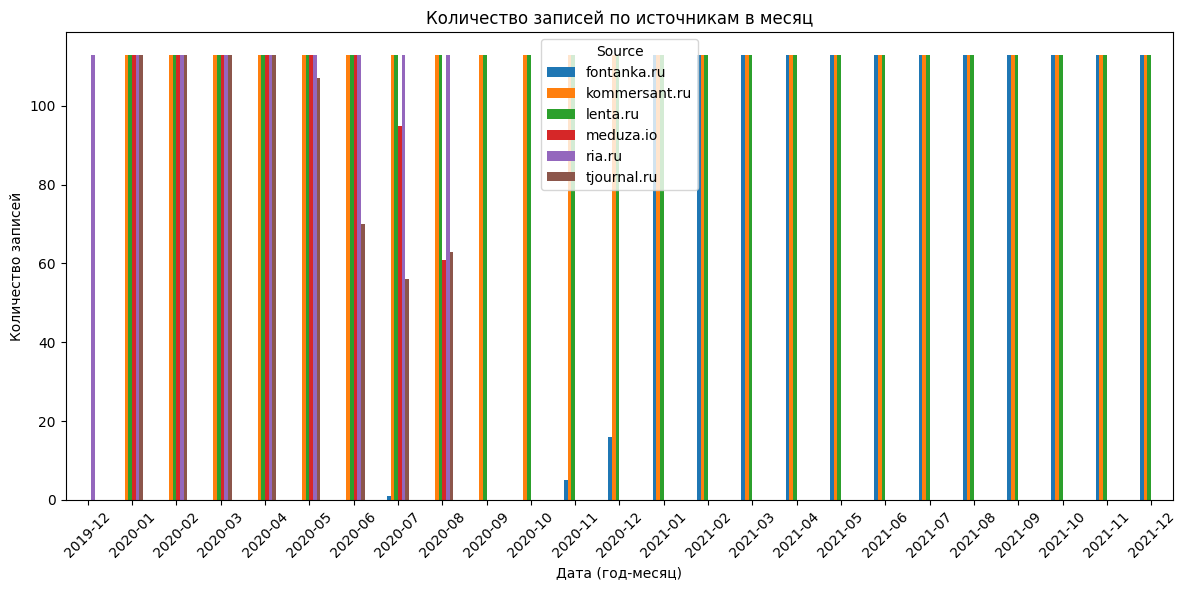

In [ ]:
# Если делать стратифицированный отбор на всех источниках
import matplotlib.pyplot as plt

df["year_month"] = df["date"].dt.to_period("M")

sample_size = 10000
n_groups = len(df.groupby(["source", "year_month"]))
group_size = sample_size // n_groups

print(f"{sample_size=}, {group_size=}")

sampled = (
    df.groupby(["source", "year_month"], group_keys=False)
      .apply(lambda g: g.sample(n=group_size, random_state=42, replace=False) if len(g) > group_size else g)
)

# группируем по месяцу и источнику
sampled['year_month'] = sampled['date'].dt.to_period('M')
counts = sampled.groupby(['year_month', 'source']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(12,6))
plt.xlabel('Дата (год-месяц)')
plt.ylabel('Количество записей')
plt.title('Количество записей по источникам в месяц')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

sample_size=10000, group_size=147


/tmp/ipykernel_102139/793977697.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=group_size, random_state=42, replace=False) if len(g) > group_size else g)


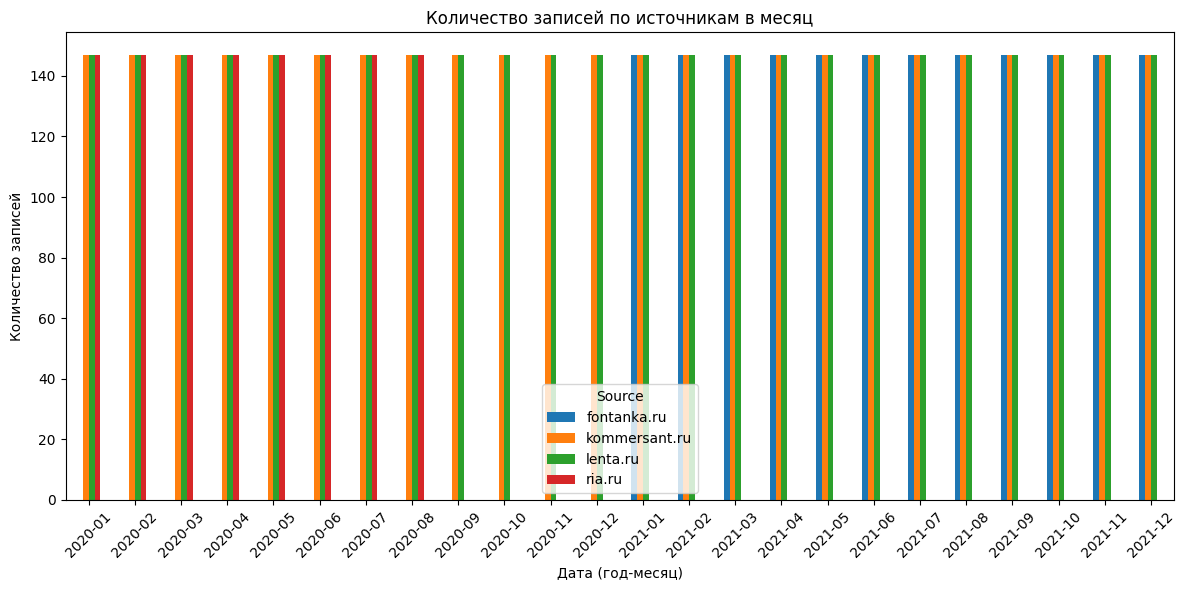

In [ ]:
# Если делать стратифицированный отбор на самых полных источниках
from datetime import date

import matplotlib.pyplot as plt

tmp_df = df[
    (df["source"] == "lenta.ru") |
    (df["source"] == "kommersant.ru") | 
    ((df["source"] == "fontanka.ru") & (df["date"].dt.date > date(2021, 1, 1))) |
    ((df["source"] == "ria.ru") & (df["date"].dt.date > date(2020, 1, 1)))
]

sample_size = 10000
n_groups = len(tmp_df.groupby(["source", "year_month"]))
group_size = sample_size // n_groups

print(f"{sample_size=}, {group_size=}")

sampled = (
    tmp_df.groupby(["source", "year_month"], group_keys=False)
      .apply(lambda g: g.sample(n=group_size, random_state=42, replace=False) if len(g) > group_size else g)
)

# группируем по месяцу и источнику
sampled['year_month'] = sampled['date'].dt.to_period('M')
counts = sampled.groupby(['year_month', 'source']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(12,6))
plt.xlabel('Дата (год-месяц)')
plt.ylabel('Количество записей')
plt.title('Количество записей по источникам в месяц')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

In [97]:
import json
with open("./data/data.json", "w", encoding="utf-8") as f:
    json.dump(sampled.drop(columns="year_month").astype({"date": str}).to_dict("records"), f, indent=4, ensure_ascii=False)